<a href="https://colab.research.google.com/github/Abinayak03/Machine_learning/blob/main/variance_inflation_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 align="center">Codebasics ML Course: Feature Selection Using VIF</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('salaries.csv')
df.head()

,Years of Experience,Education Level,Age,Location Factor,Salary
0,29,1,49,7,124204
1,27,3,45,4,125948
2,20,4,41,8,116078
3,14,4,37,5,106486
4,20,3,42,7,113297


In [4]:
df.shape

(1000, 5)

### Train a Model With All Features

In [19]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df.drop('Salary',axis=1)
y=df['Salary']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lr=LinearRegression()
lr.fit(X_train,y_train)

lr.score(X_test,y_test)

0.959406861351375

In [9]:
lr.coef_   #coef of age column is not appreciable

array([2109.51761869, 5060.61877537, -120.2791406 , 1495.70225789])

In [10]:
lr.intercept_

52519.18303688654

**Calculate the correlation**

<Axes: >

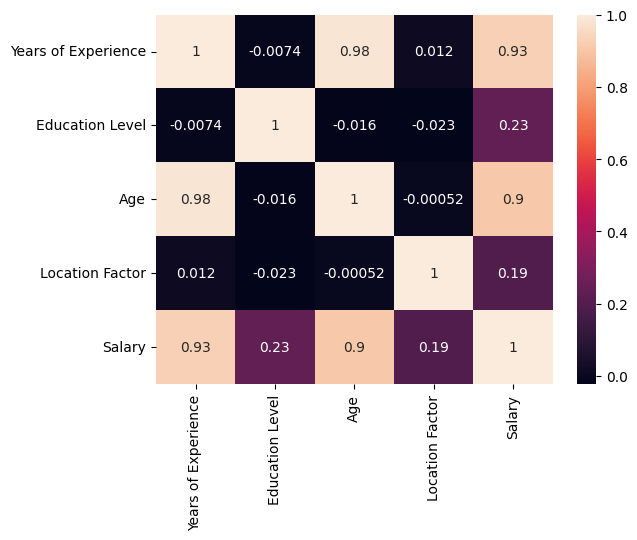

In [11]:
cr=df.corr()
sns.heatmap(cr,annot=True)  # this shows the high correlation between the features(age and years of experience)

### Compute Variance Inflation Factor (VIF)

In [13]:
!pip install statsmodels


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(data):
  df_vif=pd.DataFrame()
  df_vif['Features']=data.columns
  df_vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return df_vif

In [22]:
vif(X)

,Features,VIF
0,Years of Experience,22.342087
1,Education Level,5.472969
2,Age,42.201149
3,Location Factor,4.289467


**DRop age column**

In [23]:
vif(X.drop('Age',axis=1))

,Features,VIF
0,Years of Experience,3.198601
1,Education Level,3.509425
2,Location Factor,3.231181


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X.drop('Age',axis=1),y,test_size=0.2,random_state=42)

In [26]:
model_reduced=LinearRegression()
model_reduced.fit(X_train, y_train)
model_reduced.score(X_test, y_test)

0.9592314656682583